# Pandas Foundations

## What is pandas?
- python library for data analysis
- High-performance containers for data analysis
- Data structures with a lot of functionality
    - meaningul labels
    - time series functionsality
    - handling missing data
    - relational operations
    
## What will you learn
- how to work with pandas
    - data import/export in various formats
- exploratory data analysis using pandas
    - statistical & graphical methods
- usign padnas to model *time series*
    - time indexes, resampling
    
    
---

## Review of pandas DataFrames



### pandas `DataFrames`
- example DataFrame of Apple stock data

In [271]:
import pandas as pd
import pandas_datareader.data as web
import datetime



start = datetime.datetime(1980,1,1)
end = datetime.datetime(2015,1,1)
 
AAPL = web.DataReader("AAPL", "quandl", start, end)
 
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8588 entries, 2014-12-31 to 1980-12-12
Data columns (total 12 columns):
Open          8588 non-null float64
High          8588 non-null float64
Low           8588 non-null float64
Close         8588 non-null float64
Volume        8588 non-null float64
ExDividend    8588 non-null float64
SplitRatio    8588 non-null float64
AdjOpen       8588 non-null float64
AdjHigh       8588 non-null float64
AdjLow        8588 non-null float64
AdjClose      8588 non-null float64
AdjVolume     8588 non-null float64
dtypes: float64(12)
memory usage: 872.2 KB


In [272]:
cols = ['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume']
AAPL = AAPL[cols]
#AAPL.head()
AAPL.head()

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,41403351.0
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,33720951.0
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0


## Indexes and columns

In [244]:
AAPL.shape

(8588, 6)

In [245]:
AAPL.columns

Index(['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [246]:
type(AAPL.columns)

pandas.core.indexes.base.Index

In [237]:
type(AAPL.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Slicing

In [247]:
AAPL.iloc[:5,:]

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,41403351.0
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,33720951.0
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0


In [249]:
AAPL.iloc[-5:,:]

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-18,0.391536,26.63,26.75,26.63,26.63,327900.0
1980-12-17,0.380362,25.87,26.00,25.87,25.87,385900.0
1980-12-16,0.371246,25.25,25.37,25.25,25.37,472000.0
1980-12-15,0.400652,27.25,27.38,27.25,27.38,785200.0
1980-12-12,0.422706,28.75,28.87,28.75,28.75,2093900.0


## `head()`

In [250]:
AAPL.head(5)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,41403351.0
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,33720951.0
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0


## `tail()`

In [251]:
AAPL.tail()

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-18,0.391536,26.63,26.75,26.63,26.63,327900.0
1980-12-17,0.380362,25.87,26.00,25.87,25.87,385900.0
1980-12-16,0.371246,25.25,25.37,25.25,25.37,472000.0
1980-12-15,0.400652,27.25,27.38,27.25,27.38,785200.0
1980-12-12,0.422706,28.75,28.87,28.75,28.75,2093900.0


In [252]:
AAPL.tail(3)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-16,0.371246,25.25,25.37,25.25,25.37,472000.0
1980-12-15,0.400652,27.25,27.38,27.25,27.38,785200.0
1980-12-12,0.422706,28.75,28.87,28.75,28.75,2093900.0


## `info()`

In [253]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8588 entries, 2014-12-31 to 1980-12-12
Data columns (total 6 columns):
AdjClose    8588 non-null float64
Close       8588 non-null float64
High        8588 non-null float64
Low         8588 non-null float64
Open        8588 non-null float64
Volume      8588 non-null float64
dtypes: float64(6)
memory usage: 469.7 KB


## Broadcasting

In [254]:
import numpy as np

AAPL.iloc[::3,-1] = np.nan  # assinging scalar value to column, slice broadcast value to each row

AAPL.head(7)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,NaN
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,NaN
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0
2014-12-23,106.913471,112.54,113.33,112.46,113.23,26028419.0
2014-12-22,107.293472,112.94,113.49,111.97,112.16,NaN


In [255]:
# Volume    5923 non-null float64,  not 8885
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8588 entries, 2014-12-31 to 1980-12-12
Data columns (total 6 columns):
AdjClose    8588 non-null float64
Close       8588 non-null float64
High        8588 non-null float64
Low         8588 non-null float64
Open        8588 non-null float64
Volume      5725 non-null float64
dtypes: float64(6)
memory usage: 469.7 KB


## Series

In [256]:
low = AAPL['Low']

type(low)

pandas.core.series.Series

In [257]:
low.head()

Date
2014-12-31    110.21
2014-12-30    112.11
2014-12-29    113.70
2014-12-26    112.01
2014-12-24    112.01
Name: Low, dtype: float64

In [258]:
lows = low.values
type(lows) # array([   0.5134,    0.4866,    0.4509, ...,  112.11  ,  110.21  ,  110.38  ])

numpy.ndarray

# Building DataFrames from Scratch

## DataFrames from CSV files

In [37]:
import pandas as pd

users = pd.read_csv('users.csv', index_col=0)
print(users)

           city  visitors  signups
weekday                           
Sun      Austin       139        7
Sun      Dallas       237       12
Mon      Austin       326        3
Mon      Dallas       456        5


## DataFrames from dict() 

In [41]:
import pandas as pd

data = {
    'weekday': ['Sun','Sun', 'Mon', 'Mon'],
    'city' : ['Austin', 'Dallas', 'Austin', 'Dallas'],
    'visitors': [139,237,326,456],
    'signups' : [7,12,3,5]
}

users_d = pd.DataFrame(data)

print(users_d)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


In [42]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7,12,3,5]
visitors = [139,237,326,456]
weekdays = ['Sun','Sun', 'Mon', 'Mon']

list_labels = ['city', 'signups','visitors','weekday']

list_cols = [cities,signups, visitors, weekdays]

zipped = list(zip(list_labels, list_cols))

print(zipped)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]


In [43]:
data = dict(zipped)
users_d2 = pd.DataFrame(data)
print(users_d2)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


## Broadcasting

In [44]:
users['fees'] = 0 # broadcast to entire column

print(users)

           city  visitors  signups  fees
weekday                                 
Sun      Austin       139        7     0
Sun      Dallas       237       12     0
Mon      Austin       326        3     0
Mon      Dallas       456        5     0


## Broadcasting with a dict

In [46]:
heights = [59.0, 65.2, 62.9, 65.4, 63.7, 65.7, 64.1]

data = {'height':heights,'sex': 'M'}

results = pd.DataFrame(data)

print(results)

   height sex
0    59.0   M
1    65.2   M
2    62.9   M
3    65.4   M
4    63.7   M
5    65.7   M
6    64.1   M


## Index and column

In [47]:
results.columns = ['height (in)', 'sex']

results.index = ['A', 'B','C', 'D', 'E', 'F', 'G']

print(results)

   height (in) sex
A         59.0   M
B         65.2   M
C         62.9   M
D         65.4   M
E         63.7   M
F         65.7   M
G         64.1   M


---

## Importing & exporting data

## original CSV file
- Dataset: sunpsopt observations collected from SILSO

## Datasets from CSV files

In [59]:
import pandas as pd

filepath = 'ISSN_D_tot.csv'

sunspots = pd.read_csv(filepath, sep=';')

In [60]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73079 entries, 0 to 73078
Data columns (total 8 columns):
1818        73079 non-null int64
01          73079 non-null int64
01.1        73079 non-null int64
1818.001    73079 non-null float64
  -1        73079 non-null int64
 -1.0       73079 non-null float64
   0        73079 non-null int64
1           73079 non-null int64
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [62]:
sunspots.iloc[10:20, :]

,1818,01,01.1,1818.001,-1,-1.0,0,1
10,1818,1,12,1818.032,-1,-1.0,0,1
11,1818,1,13,1818.034,37,7.7,1,1
12,1818,1,14,1818.037,-1,-1.0,0,1
13,1818,1,15,1818.040,-1,-1.0,0,1
14,1818,1,16,1818.042,-1,-1.0,0,1
15,1818,1,17,1818.045,77,11.1,1,1
16,1818,1,18,1818.048,98,12.6,1,1
17,1818,1,19,1818.051,105,13.0,1,1
18,1818,1,20,1818.053,-1,-1.0,0,1
19,1818,1,21,1818.056,-1,-1.0,0,1


## Problems

- CSV file has no columns headers
    - columns 0-2: gregorian date (year,month day)
    - columns 3: date4 as fractiona as year
    - column 4: daily total sunspots number
    - column 5: defenitive/provisional indicator (1 or 0)
- missing values in column 4: indicated by -1
- dates representation inconvenient


## Using keywords

In [95]:
sunspots = pd.read_csv(filepath,sep=';', 
                       usecols=[0,1,2,3,4,7],
                       header = None)
# remove col 5,6 not needed
sunspots.iloc[10:20, :]

#sunspots.info()

,0,1,2,3,4,7
10,1818,1,11,1818.029,-1,1
11,1818,1,12,1818.032,-1,1
12,1818,1,13,1818.034,37,1
13,1818,1,14,1818.037,-1,1
14,1818,1,15,1818.040,-1,1
15,1818,1,16,1818.042,-1,1
16,1818,1,17,1818.045,77,1
17,1818,1,18,1818.048,98,1
18,1818,1,19,1818.051,105,1
19,1818,1,20,1818.053,-1,1



## using names keyword

In [203]:
col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','std','obs_num' ,'definite']

#col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','definite']

sunspots = pd.read_csv(filepath,  na_values = ["-1", '-1.0'],
                       header = None,
                       sep=';', 
                       #usecols=[0,1,2,3,4,7], 
                       names=col_names)

#sunspots.sunspots = sunspots.sunspots.astype(float)
#sunspots.iloc[10:20, :]
#sunspots.head()
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73080 entries, 0 to 73079
Data columns (total 8 columns):
year        73080 non-null int64
month       73080 non-null int64
day         73080 non-null int64
dec_date    73080 non-null float64
sunspots    73080 non-null int64
std         69833 non-null float64
obs_num     73080 non-null int64
definite    73080 non-null int64
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


## Using na_values keywords

In [204]:
sunspots.head()  # does not work!!

,year,month,day,dec_date,sunspots,std,obs_num,definite
0,1818,1,1,1818.001,-1,NaN,0,1
1,1818,1,2,1818.004,-1,NaN,0,1
2,1818,1,3,1818.007,-1,NaN,0,1
3,1818,1,4,1818.010,-1,NaN,0,1
4,1818,1,5,1818.012,-1,NaN,0,1


## Using parse_dates keyword

In [211]:
#col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','std','obs_num' ,'definite']

col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','definite']

sunspots = pd.read_csv(filepath,
                       sep=';', 
                       usecols=[0,1,2,3,4,7], 
                       names=col_names,
                       na_values={'sunspots':[' -1']},  # does not work
                      parse_dates=[[0,1,2]])

#sunspots.head()
sunspots.iloc[10:20, :]


,year_month_day,dec_date,sunspots,definite
10,1818-01-11,1818.029,-1,1
11,1818-01-12,1818.032,-1,1
12,1818-01-13,1818.034,37,1
13,1818-01-14,1818.037,-1,1
14,1818-01-15,1818.040,-1,1
15,1818-01-16,1818.042,-1,1
16,1818-01-17,1818.045,77,1
17,1818-01-18,1818.048,98,1
18,1818-01-19,1818.051,105,1
19,1818-01-20,1818.053,-1,1


## Inspecting DataFrame

In [212]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73080 entries, 0 to 73079
Data columns (total 4 columns):
year_month_day    73080 non-null datetime64[ns]
dec_date          73080 non-null float64
sunspots          73080 non-null int64
definite          73080 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.2 MB


## using dates as index

In [213]:
sunspots.index = sunspots['year_month_day']

sunspots.index.name = 'date'  # change the col name to date

sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73080 entries, 1818-01-01 to 2018-01-31
Data columns (total 4 columns):
year_month_day    73080 non-null datetime64[ns]
dec_date          73080 non-null float64
sunspots          73080 non-null int64
definite          73080 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.8 MB


## trimming redundant columns

In [214]:
cols = ['sunspots', 'definite']

sunspots = sunspots[cols]

sunspots.iloc[10:20, :]

,sunspots,definite
date,,
1818-01-11,-1,1
1818-01-12,-1,1
1818-01-13,37,1
1818-01-14,-1,1
1818-01-15,-1,1
1818-01-16,-1,1
1818-01-17,77,1
1818-01-18,98,1
1818-01-19,105,1


## Writting files

In [216]:
out_csv = 'sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'sunspots.tsv'
sunspots.to_csv(out_tsv, sep='\t')

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel(out_xlsx)

---

# Plotting with pandas

## AAPL stock data

In [259]:
AAPL.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8588 entries, 2014-12-31 to 1980-12-12
Data columns (total 6 columns):
AdjClose    8588 non-null float64
Close       8588 non-null float64
High        8588 non-null float64
Low         8588 non-null float64
Open        8588 non-null float64
Volume      5725 non-null float64
dtypes: float64(6)
memory usage: 469.7 KB


In [261]:
AAPL.head(6)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,NaN
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,NaN
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0
2014-12-23,106.913471,112.54,113.33,112.46,113.23,26028419.0


## Plotting arrays (matplotlib)


In [262]:
close_arr = AAPL['Close'].values

In [263]:
type(close_arr)

numpy.ndarray

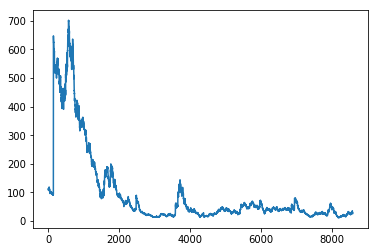

In [265]:
import matplotlib.pyplot as plt

plt.plot(close_arr)
plt.show()

## plotting Series (matplotlib)

In [266]:
close_series = AAPL['Close']
type(close_series)

pandas.core.series.Series

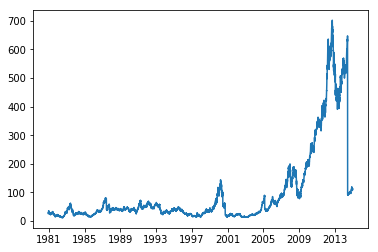

In [267]:
plt.plot(close_series)
plt.show()

## Plotting Series (pandas)

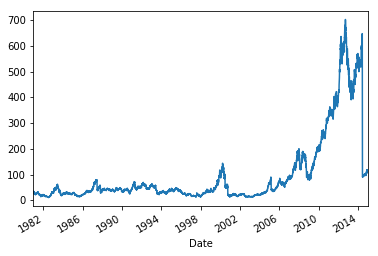

In [268]:
close_series.plot()  # plots Series directly
plt.show()

## plotting Dataframes (pandas)

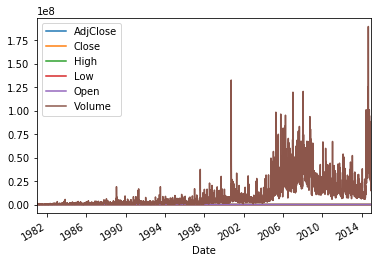

In [274]:
AAPL.plot()  # plots ALL Series at one
plt.show()

## plotting DataFrames (matplotlib)

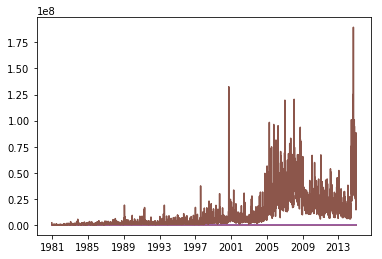

In [276]:
plt.plot(AAPL)  # plots all col at once

plt.show()

## Fixing scale

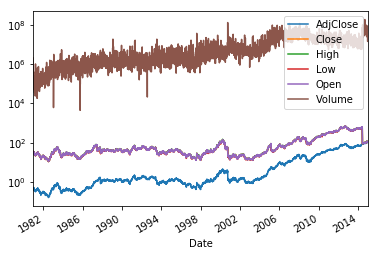

In [277]:
AAPL.plot()
plt.yscale('log')  # logarithmic scale on vertical axis
plt.show()

## Customizing plots

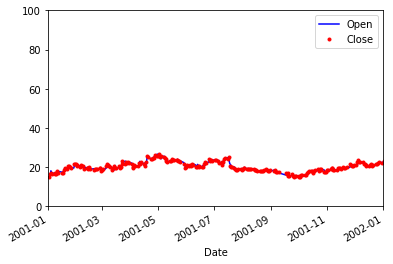

In [285]:
AAPL['Open'].plot(color='b', style='-', legend=True)
AAPL['Close'].plot(color='r', style='.', legend=True)

plt.axis(('2001','2002',0, 100))
plt.show()

## Saving plots

In [291]:

## gives error
AAPL.loc['2001':'2004',['Open','Close','High', 'Low']].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [288]:
plt.savefig('AAPL.png')
plt.savefig('AAPL.jpg')

plt.savefig('aapl.pdf')
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [287]:
!ls

01Data_ingestion_and_inspection.ipynb	     sunspots.csv
ISSN_D_tot.csv				     sunspots.tsv
NOAA_QCLCD_2011_hourly_13904.txt	     sunspots.xlsx
SN_y_tot_V2.0.csv			     tips.csv
austin_airport_departure_data_2015_july.csv  titanic.csv
auto-mpg.csv				     users.csv
life_expectancy_at_birth.csv		     weather_data_austin_2010 (1).csv
messy_stock_data.tsv			     world_ind_pop_data.csv
percent-bachelors-degrees-women-usa.csv      world_population.csv
